In [1]:
!pip install wordcloud


In [2]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package wordnet to C:\Users\Arpit
[nltk_data]     Shet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Arpit
[nltk_data]     Shet\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Arpit
[nltk_data]     Shet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
!pip install nlp_utils

In [4]:
import nltk
import string
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances
import nlp_utils as nu  # Ensure this custom utility module is available

# Load your text data (using raw string to handle backslashes)
f = open(r"C:\Users\Arpit Shet\Downloads\Chatbot+files\Note book\dialogs.txt", "r")
# Preview the content (optional)
content = f.read()
print(content)  

# Read the data into a DataFrame (assuming tab-delimited)
df = pd.read_csv(r"C:\Users\Arpit Shet\Downloads\Chatbot+files\Note book\dialogs.txt", names=('Query', 'Response'), sep='\t')


# Your subsequent code using pandas DataFrame and other libraries

hi, how are you doing?	i'm fine. how about yourself?
i'm fine. how about yourself?	i'm pretty good. thanks for asking.
i'm pretty good. thanks for asking.	no problem. so how have you been?
no problem. so how have you been?	i've been great. what about you?
i've been great. what about you?	i've been good. i'm in school right now.
i've been good. i'm in school right now.	what school do you go to?
what school do you go to?	i go to pcc.
i go to pcc.	do you like it there?
do you like it there?	it's okay. it's a really big campus.
it's okay. it's a really big campus.	good luck with school.
good luck with school.	thank you very much.
how's it going?	i'm doing well. how about you?
i'm doing well. how about you?	never better, thanks.
never better, thanks.	so how have you been lately?
so how have you been lately?	i've actually been pretty good. you?
i've actually been pretty good. you?	i'm actually in school right now.
i'm actually in school right now.	which school do you attend?
which school do 

In [5]:
print(df.shape)  # Display the shape of the DataFrame
print(df.columns)  # Display the columns in the DataFrame
print(df.info())  # Get information about the DataFrame
print(df.describe())  # Describe the DataFrame
print(df.nunique())  # Get the number of unique values in each column
print(df.isnull().sum())  # Check for missing values


(3725, 2)
Index(['Query', 'Response'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Query     3725 non-null   object
 1   Response  3725 non-null   object
dtypes: object(2)
memory usage: 58.3+ KB
None
                    Query           Response
count                3725               3725
unique               3510               3512
top     what do you mean?  what do you mean?
freq                   22                 22
Query       3510
Response    3512
dtype: int64
Query       0
Response    0
dtype: int64


In [6]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Arpit
[nltk_data]     Shet\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()

def lemmatization_sentence(sentence):
    words = word_tokenize(sentence)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)


In [8]:
sid = SentimentIntensityAnalyzer()
df['rating'] = df['Query'].apply(sid.polarity_scores)
df = pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)
print(df.head())


                                 Query  \
0               hi, how are you doing?   
1        i'm fine. how about yourself?   
2  i'm pretty good. thanks for asking.   
3    no problem. so how have you been?   
4     i've been great. what about you?   

                                   Response    neg    neu    pos  compound  
0             i'm fine. how about yourself?  0.000  1.000  0.000    0.0000  
1       i'm pretty good. thanks for asking.  0.000  0.690  0.310    0.2023  
2         no problem. so how have you been?  0.000  0.250  0.750    0.8402  
3          i've been great. what about you?  0.495  0.505  0.000   -0.5994  
4  i've been good. i'm in school right now.  0.000  0.549  0.451    0.6249  


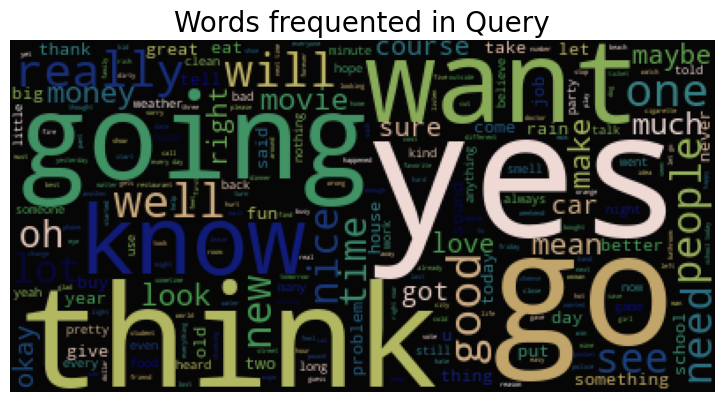

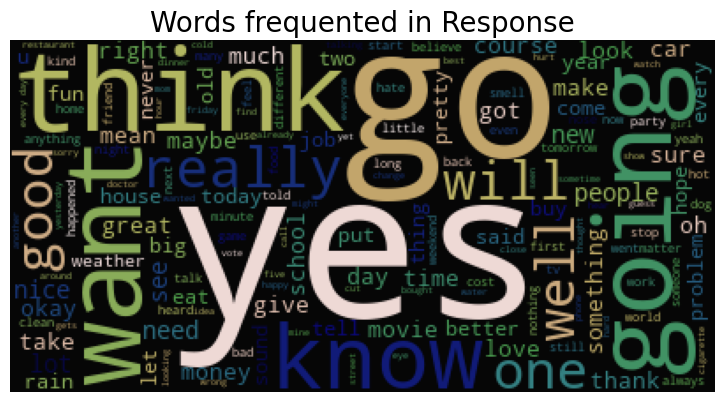

In [9]:
def wordcloud(df, label):
    subset = df[df[label] == 1]
    text = df['Query'].values
    wc = WordCloud(background_color="black", max_words=1000)
    wc.generate(" ".join(text))
    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title(f"Words frequented in {label}", fontsize=20)
    plt.imshow(wc.recolor(colormap='gist_earth', random_state=244), alpha=0.98)

wordcloud(df, 'Query')
wordcloud(df, 'Response')


In [10]:
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
remove_n = lambda x: re.sub("\n", " ", x)
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]', r' ', x)
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

df['Query'] = df['Query'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
df['Response'] = df['Response'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

print(df.head())


                                 Query  \
0               hi  how are you doing    
1        i m fine  how about yourself    
2  i m pretty good  thanks for asking    
3    no problem  so how have you been    
4     i ve been great  what about you    

                                   Response    neg    neu    pos  compound  
0             i m fine  how about yourself   0.000  1.000  0.000    0.0000  
1       i m pretty good  thanks for asking   0.000  0.690  0.310    0.2023  
2         no problem  so how have you been   0.000  0.250  0.750    0.8402  
3          i ve been great  what about you   0.495  0.505  0.000   -0.5994  
4  i ve been good  i m in school right now   0.000  0.549  0.451    0.6249  


In [11]:
imp_sent = df.sort_values(by='compound', ascending=False)
print(imp_sent.head(5))

pos_sent = df.sort_values(by='pos', ascending=False)
print(pos_sent.head(5))

neg_sent = df.sort_values(by='neg', ascending=False)
print(neg_sent.head(5))

neu_sent = df.sort_values(by='neu', ascending=False)
print(neu_sent.head(5))


                                                  Query  \
1019  if we are good  we will be happy in heaven wit...   
565   yeah  it sounds like it s going to be the best...   
1235  that is a lot of friends  do you have a best f...   
3414  well  that s okay  as long as it helps him rel...   
3470  so it s better to save money than to have an h...   

                                               Response  neg    neu    pos  \
1019                   that s what many people believe   0.0  0.400  0.600   
565   exactly  it seems like it s going to be loads ...  0.0  0.463  0.537   
1235            of course  i have lots of best friends   0.0  0.400  0.600   
3414  yes  we need a relaxed president who thinks cl...  0.0  0.419  0.581   
3470  well  the democratic party says it was an hone...  0.0  0.482  0.518   

      compound  
1019    0.9001  
565     0.8910  
1235    0.8885  
3414    0.8883  
3470    0.8651  
                       Query  \
1659                 please    
1191      

In [12]:
tfidf = TfidfVectorizer()
factors = tfidf.fit_transform(df['Query']).toarray()
print(tfidf.get_feature_names_out())  # Use the updated method name

def chatbot(query):
    query = nu.lemmatization_sentence(query)
    query_vector = tfidf.transform([query]).toarray()
    similar_score = 1 - cosine_distances(factors, query_vector)
    index = similar_score.argmax()
    matching_question = df.loc[index]['Query']
    response = df.loc[index]['Response']
    pos_score = df.loc[index]['pos']
    neg_score = df.loc[index]['neg']
    neu_score = df.loc[index]['neu']
    confidence = similar_score[index][0]
    chat_dict = {
        'match': matching_question,
        'response': response,
        'score': confidence,
        'pos': pos_score,
        'neg': neg_score,
        'neu': neu_score
    }
    return chat_dict


['able' 'about' 'absolutely' ... 'yy' 'zip' 'zoo']


In [13]:
def chatbot(query):
    query = lemmatization_sentence(query)
    query_vector = tfidf.transform([query]).toarray()
    similar_score = 1 - cosine_distances(factors, query_vector)
    index = similar_score.argmax()
    matching_question = df.loc[index]['Query']
    response = df.loc[index]['Response']
    pos_score = df.loc[index]['pos']
    neg_score = df.loc[index]['neg']
    neu_score = df.loc[index]['neu']
    confidence = similar_score[index][0]
    chat_dict = {
        'match': matching_question,
        'response': response,
        'score': confidence,
        'pos': pos_score,
        'neg': neg_score,
        'neu': neu_score
    }
    return chat_dict


In [14]:
while True:
    query = input('USER: ')
    if query.lower() == 'exit':
        break
    response = chatbot(query)
    if response['score'] <= 0.2:
        print('BOT: Please rephrase your Question.')
    else:
        print('='*80)
        print(f"logs:\n Matched Question: {response['match']}\n Confidence Score: {response['score']*100:.2f}%")
        print(f" PositiveScore: {response['pos']}\n NegativeScore: {response['neg']}\n NeutralScore: {response['neu']}")
        print('='*80)
        print('BOT:', response['response'])


USER:  my name is arpit what is your name ?


logs:
 Matched Question: what is your major 
 Confidence Score: 54.69%
 PositiveScore: 0.0
 NegativeScore: 0.0
 NeutralScore: 1.0
BOT: english 


USER:  hi english


logs:
 Matched Question: english 
 Confidence Score: 64.84%
 PositiveScore: 0.0
 NegativeScore: 0.0
 NeutralScore: 1.0
BOT: what are you going to do with an english major 


USER:  i dont know


logs:
 Matched Question: i know that 
 Confidence Score: 83.35%
 PositiveScore: 0.0
 NegativeScore: 0.0
 NeutralScore: 1.0
BOT: but you re doing   


USER:  exit
